<a href="https://colab.research.google.com/github/TokyoYoshida/GoogleColab/blob/master/lightGBMTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
# 必要ならば以下のようにディレクトリ移動する


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
%cd /content/drive/'My Drive'/'★個人専用ファイル'/'開発用・個人サービス開発'/'GoogleColab'/

/content/drive/My Drive/★個人専用ファイル/開発用・個人サービス開発/GoogleColab


In [3]:
%ls


data/
duel_dqn_Pendulum-v0_weights.h5f
h5f/
playground_dqn_keiba
playground_dqn_keiba_try_layer_add_depth
playground_dqn_keiba_try_long_term_reward
playground_dqn_keiba_try_simple
playground_dqn_keiba_try_simple2
playground_dqn_keiba_try_simple_x_1
playground_dqn_study.ipynb
playground_dqn_study_my_try.ipynb
playground_dqn_study_my_try_modify_reward
playground.ipynb


In [4]:
!pip install lightgbm

In [0]:
import lightgbm as lgb
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 100)
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
# Breast Cancer データセットを読み込む
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

# 訓練データとテストデータに分割する
X_train, X_test, y_train, y_test = train_test_split(X, y)

# データセットを生成する
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

In [0]:
# LightGBM のハイパーパラメータ
lgbm_params = {
    # 二値分類問題
    'objective': 'binary',
    # AUC の最大化を目指す
    'metric': 'auc',
}

In [8]:
# 上記のパラメータでモデルを学習する
model = lgb.train(lgbm_params, lgb_train, valid_sets=lgb_eval)


[1]	valid_0's auc: 0.970588
[2]	valid_0's auc: 0.991262
[3]	valid_0's auc: 0.992434
[4]	valid_0's auc: 0.991581
[5]	valid_0's auc: 0.993713
[6]	valid_0's auc: 0.993926
[7]	valid_0's auc: 0.994352
[8]	valid_0's auc: 0.9935
[9]	valid_0's auc: 0.993926
[10]	valid_0's auc: 0.994032
[11]	valid_0's auc: 0.993286
[12]	valid_0's auc: 0.994032
[13]	valid_0's auc: 0.994672
[14]	valid_0's auc: 0.993606
[15]	valid_0's auc: 0.993606
[16]	valid_0's auc: 0.993393
[17]	valid_0's auc: 0.993606
[18]	valid_0's auc: 0.992967
[19]	valid_0's auc: 0.99318
[20]	valid_0's auc: 0.992967
[21]	valid_0's auc: 0.993393
[22]	valid_0's auc: 0.993393
[23]	valid_0's auc: 0.992967
[24]	valid_0's auc: 0.992754
[25]	valid_0's auc: 0.991901
[26]	valid_0's auc: 0.992114
[27]	valid_0's auc: 0.992967
[28]	valid_0's auc: 0.992967
[29]	valid_0's auc: 0.992114
[30]	valid_0's auc: 0.992754
[31]	valid_0's auc: 0.993393
[32]	valid_0's auc: 0.993606
[33]	valid_0's auc: 0.99318
[34]	valid_0's auc: 0.99318
[35]	valid_0's auc: 0.99318


In [9]:
# 保存
model.save_model('model.txt')

In [0]:
# テストデータを予測する
y_pred = model.predict(X_test, num_iteration=model.best_iteration)

In [0]:
# 保存したモデルを使う場合はこんな感じ
#bst = lgb.Booster(model_file='model.txt')
#ypred = bst.predict(X_test, num_iteration=bst.best_iteration)


In [12]:
# AUC (Area Under the Curve) を計算する
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
auc = metrics.auc(fpr, tpr)
print(auc)

0.9948849104859335


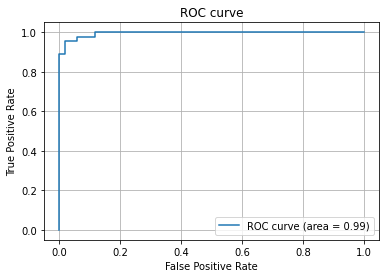

In [13]:
# ROC曲線をプロット
plt.plot(fpr, tpr, label='ROC curve (area = %.2f)'%auc)
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)